<a href="https://colab.research.google.com/github/VarshaChanumolu/ASL-Alphabet-Classification-using-Deep-Learning/blob/main/ASL%20Classification%20-%20AlexNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
from tensorflow.keras import utils
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
from keras import backend as K
from keras.models import Sequential, Model,load_model
from tensorflow.keras.optimizers import SGD, Adam
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, MaxPooling2D, MaxPool2D, Dropout
from keras.preprocessing import image
from keras.initializers import glorot_uniform
from keras.regularizers import l2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/DL/Project

/content/drive/.shortcut-targets-by-id/1hH_N2iqbtX4YiWIB8ct443lkUIuqPFqX/Project


In [ ]:
traindir = "./asl-alphabet/asl_alphabet_train/asl_alphabet_train"
testdir = "./asl-alphabet/asl_alphabet_test/asl_alphabet_test"

In [ ]:
uniq_labels = sorted(os.listdir(traindir))

In [ ]:
def load_data(trainDir,uniqueLabels, size):
    images = []
    labels = []
    #size = 32,32
    for idx, label in enumerate(uniqueLabels):
        for file in os.listdir(trainDir  +"/" + label):
          filepath = trainDir + "/" + label + "/" + file
          image = cv2.resize(cv2.imread(filepath), size)
          images.append(image)
          labels.append(idx)
        print(label)
    images = np.array(images)
    labels = np.array(labels)
    return(images, labels)

In [ ]:
images, labels = load_data(traindir,uniq_labels, (64,64))

A
B
C
D
E
F
G
H
I
J
K
L
M
N
O
P
Q
R
S
T
U
V
W
X
Y
Z
del
space


In [ ]:
X_test, y_test = load_data(testdir,uniq_labels,(64,64))

A
B
C
D
E
F
G
H
I
J
K
L
M
N
O
P
Q
R
S
T
U
V
W
X
Y
Z
del
space


In [ ]:
X_train, X_eval, y_train, y_eval = train_test_split(images, labels, test_size = 0.3, stratify = labels)

In [ ]:
train_n = len(X_train)
test_n = len(X_test)
eval_n = len(X_eval)
print("Number of training images: " , train_n)
print("Number of testing images: ", test_n)


print("Number of evaluation images: ", eval_n)

Number of training images:  58821
Number of testing images:  252
Number of evaluation images:  25209


In [ ]:
y_train = tensorflow.keras.utils.to_categorical(y_train) #basically converting to numpy array
y_test = tensorflow.keras.utils.to_categorical(y_test)
y_eval = tensorflow.keras.utils.to_categorical(y_eval)
X_train = X_train.astype('float32')/255.0  #pixels values are normalized between 0 to 255
X_test = X_test.astype('float32')/255.0
X_eval = X_eval.astype('float32')/255.0

In [ ]:
IMAGE_SHAPE = (64,64,3)

In [ ]:
def results(model,history, x_test, y_test):
  

  plt.figure(figsize=(12, 12))
  plt.subplot(3, 2, 1)
  plt.plot(history.history['accuracy'], label = 'train_accuracy')
  plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.legend()
  plt.subplot(3, 2, 2)
  plt.plot(history.history['loss'], label = 'train_loss')
  plt.plot(history.history['val_loss'], label = 'val_loss')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.legend()
  test_loss, test_acc = model.evaluate( x_test, y_test)
  print('Test accuracy:', test_acc)
  print('Test loss:', test_loss)

In [ ]:
def plot_confusion_matrix(y, y_pred):
    y = np.argmax(y, axis = 1)
    y_pred = np.argmax(y_pred, axis = 1)
    cm = confusion_matrix(y, y_pred)
    plt.figure(figsize = (15, 15))
    ax = plt.subplot()
    plt.imshow(cm, interpolation = 'nearest', cmap = plt.cm.Purples)
    plt.colorbar()
    plt.title("Confusion Matrix")
    tick_marks = np.arange(len(uniq_labels))
    plt.xticks(tick_marks, uniq_labels, rotation=45)
    plt.yticks(tick_marks, uniq_labels)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    ax.title.set_fontsize(20)
    ax.xaxis.label.set_fontsize(16)
    ax.yaxis.label.set_fontsize(16)
    limit = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment = "center",color = "white" if cm[i, j] > limit else "black")
    plt.show()

In [ ]:
model=keras.models.Sequential([
    keras.layers.Conv2D(filters=128, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(64,64,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3)),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(1024,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1024,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(28,activation='softmax')  
    
    
])

In [ ]:
model.compile(optimizer = "adam",
              loss="categorical_crossentropy",
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs = 10, batch_size = 32, validation_data = (X_eval, y_eval))

Epoch 1/10
1839/1839 [==============================] - 621s 337ms/step - loss: 1.6179 - accuracy: 0.4868 - val_loss: 1.3266 - val_accuracy: 0.5890
Epoch 2/10
1839/1839 [==============================] - 612s 333ms/step - loss: 0.5389 - accuracy: 0.8222 - val_loss: 1.3036 - val_accuracy: 0.7058
Epoch 3/10
1839/1839 [==============================] - 615s 334ms/step - loss: 0.3124 - accuracy: 0.9039 - val_loss: 0.4975 - val_accuracy: 0.8615
Epoch 4/10
1839/1839 [==============================] - 620s 337ms/step - loss: 0.2437 - accuracy: 0.9307 - val_loss: 0.5320 - val_accuracy: 0.8522
Epoch 5/10
1839/1839 [==============================] - 634s 345ms/step - loss: 0.1919 - accuracy: 0.9468 - val_loss: 1.2019 - val_accuracy: 0.7433
Epoch 6/10
1839/1839 [==============================] - 641s 348ms/step - loss: 0.1656 - accuracy: 0.9554 - val_loss: 2.3742 - val_accuracy: 0.6409
Epoch 7/10
1839/1839 [==============================] - 621s 338ms/step - loss: 0.1513 - accuracy: 0.9588 - val_

In [ ]:
model.save('AlexNet.h5')

In [ ]:
history_all = {}
# Save history    
if len(history_all) == 0:
    history_all = {key: [] for key in history.history}

for key in history_all:
    history_all[key].extend(history.history[key])

In [ ]:
def show_train_history(history, xlabel, ylabel, train, title):
    for item in train:
        plt.plot(history[item])
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(train, loc='upper left')
    plt.show()

In [ ]:
model.metrics_names

['loss', 'accuracy']

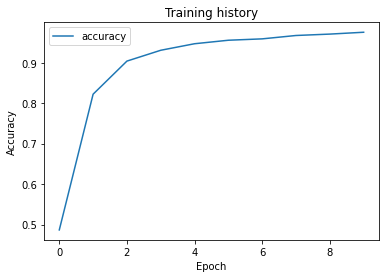

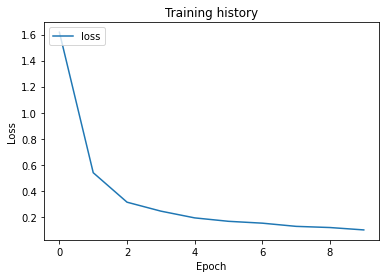

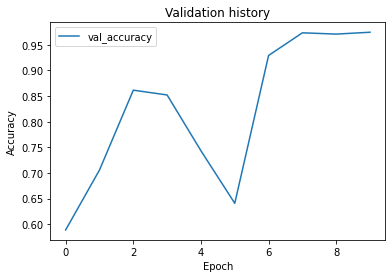

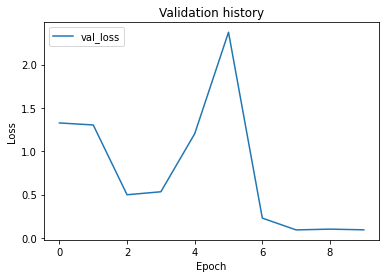

In [ ]:
show_train_history(history_all, 'Epoch', 'Accuracy', ('accuracy',), 'Training history')
show_train_history(history_all, 'Epoch', 'Loss', ('loss',), 'Training history')
show_train_history(history_all, 'Epoch', 'Accuracy', ('val_accuracy',), 'Validation history')
show_train_history(history_all, 'Epoch', 'Loss', ('val_loss',), 'Validation history')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 128)       46592     
                                                                 
 batch_normalization (BatchN  (None, 14, 14, 128)      512       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 7, 7, 128)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 256)         819456    
                                                                 
 batch_normalization_1 (Batc  (None, 7, 7, 256)        1024      
 hNormalization)                                                 
                                                        

8/8 [==============================] - 1s 80ms/step - loss: 11.7377 - accuracy: 0.1349
Test accuracy: 0.1349206417798996
Test loss: 11.737664222717285


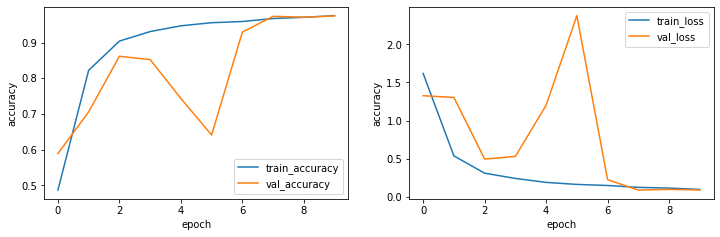

In [ ]:
results(model,history, X_test, y_test)

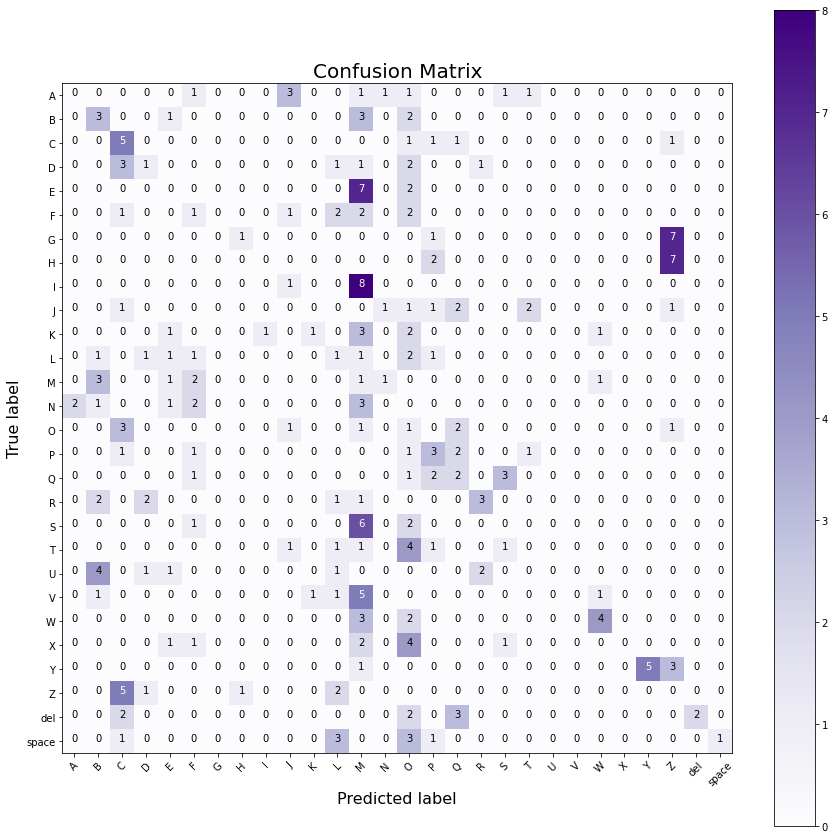

In [ ]:
y_test_pred = model.predict(X_test, batch_size = 32, verbose = 0)
plot_confusion_matrix(y_test, y_test_pred)

788/788 [==============================] - 58s 74ms/step - loss: 0.0925 - accuracy: 0.9745
Test accuracy: 0.9744932651519775
Test loss: 0.09252530336380005


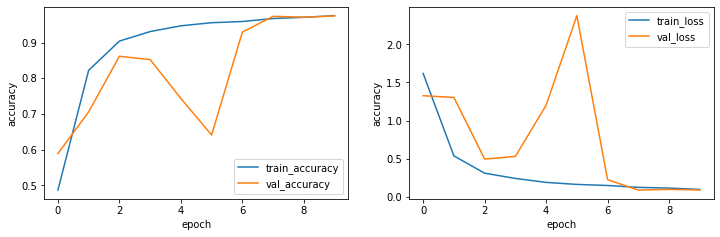

In [ ]:
results(model,history, X_eval, y_eval)

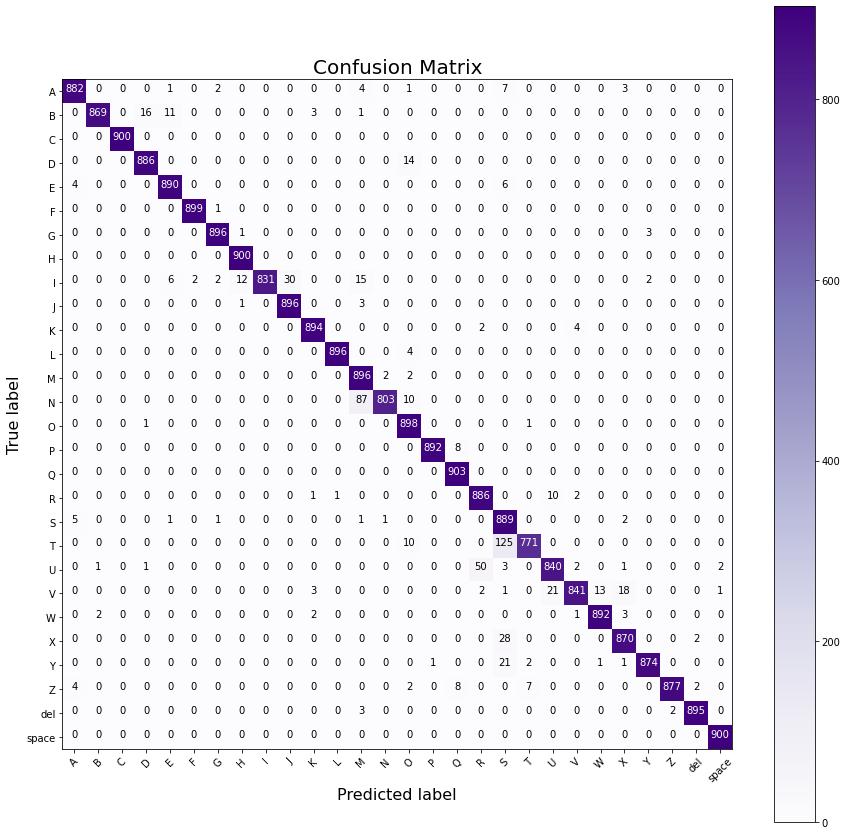

In [ ]:
y_eval_pred = model.predict(X_eval, batch_size = 32, verbose = 0)
plot_confusion_matrix(y_eval, y_eval_pred)